# Sales Data Analysis

This notebook analyzes sales data to extract meaningful insights. The objectives include:
- Understanding sales trends
- Identifying top-performing products or regions
- Making data-driven business decisions

## 1. Importing Libraries
We begin by importing necessary Python libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style='whitegrid')

## 2. Loading the Data
We load the dataset and display the first few rows to understand its structure.

In [7]:
# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 3. Data Cleaning
We check for missing values and handle them appropriately.

In [4]:
# Check for missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


## 4. Exploratory Data Analysis (EDA)
### Sales Trends Over Time

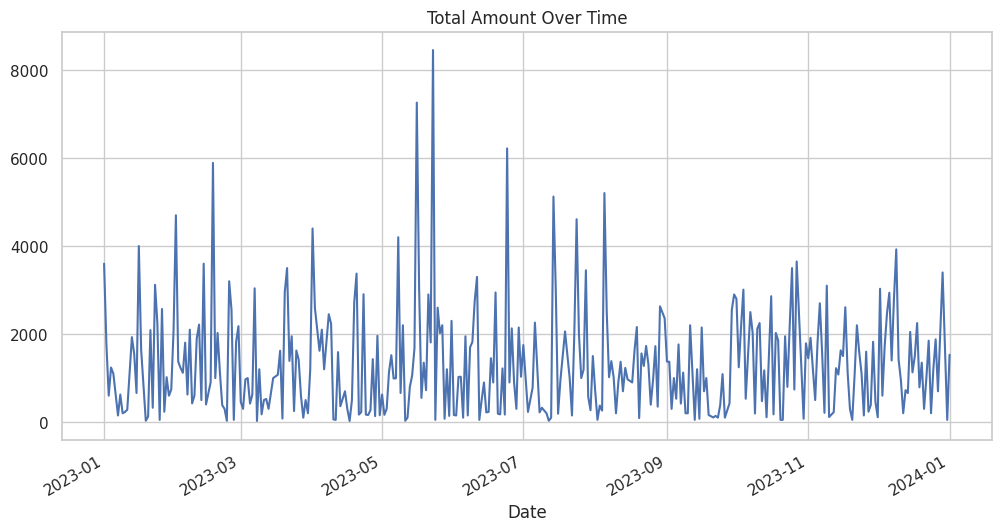

In [9]:
df = df.sort_values(by='Date')
df_daily_sales = df.groupby('Date')['Total Amount'].sum()
df_daily_sales.plot(figsize=(12,6), title='Total Amount Over Time')
plt.show()

## 5. Key Insights
- Identify top-selling products
- Sales performance by region

In [11]:
# Top-selling products
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


## 6. Conclusion
Summarize findings and suggest next steps for improving sales performance.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [22]:
df.isnull().sum()

df['Date'] = pd.to_datetime(df['Date'])

df.drop_duplicates(inplace=True)


In [23]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


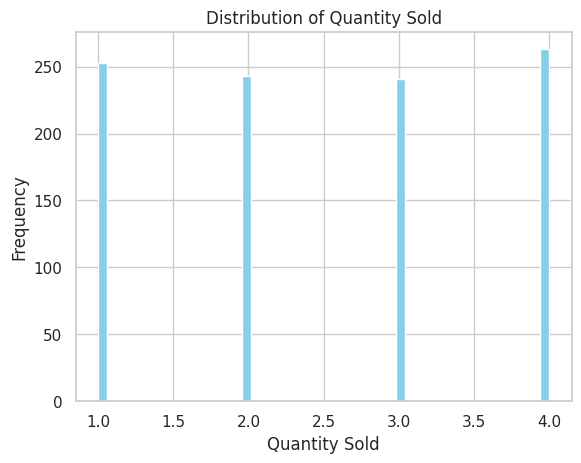

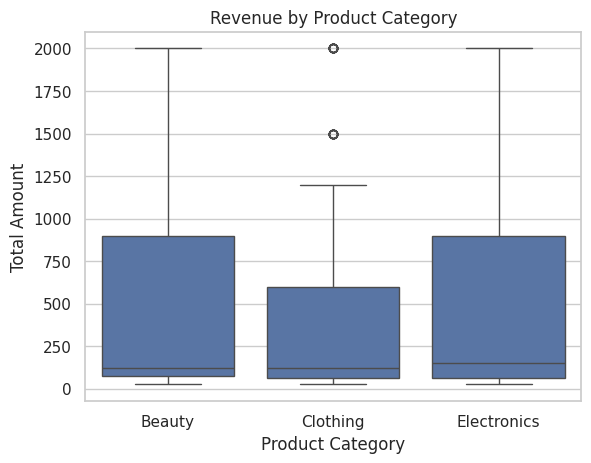

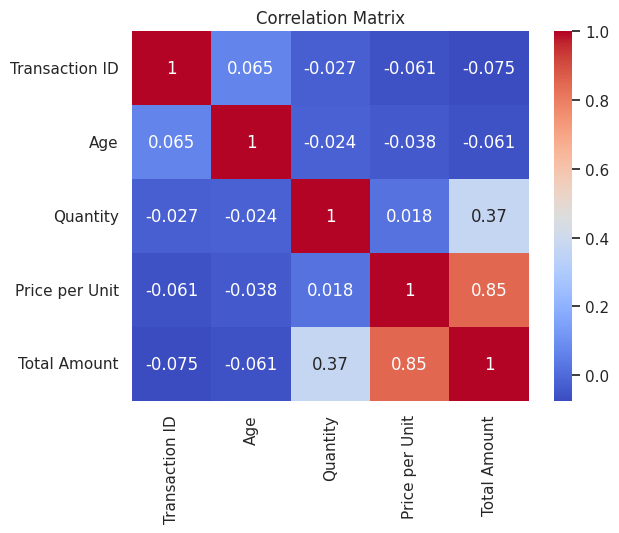

In [24]:
# Summary statistics for numerical columns
df.describe()

# Histogram of sales
df['Quantity'].hist(bins=50, color='skyblue')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

# Boxplot for outliers
sns.boxplot(x='Product Category', y='Total Amount', data=df)
plt.title('Revenue by Product Category')
plt.show()

# Correlation Heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numerical_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


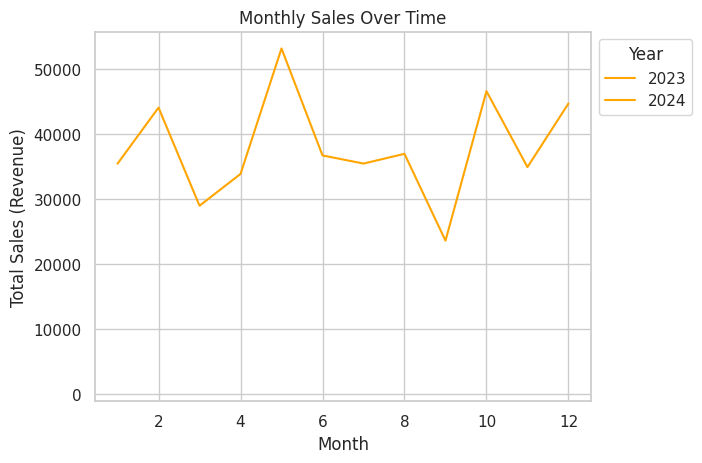

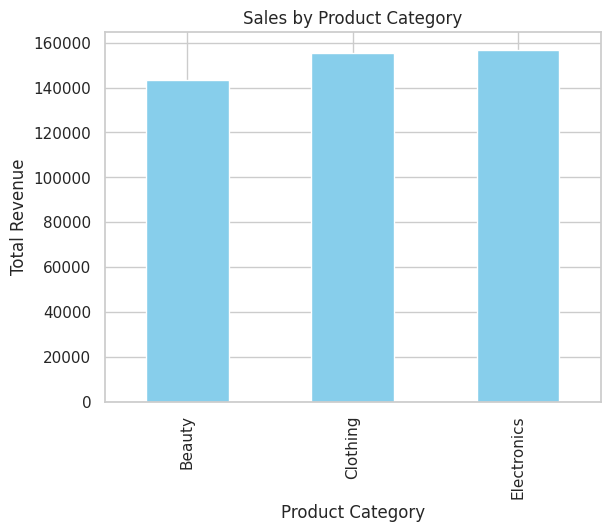

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Plotting total sales over time (Monthly)
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum()
monthly_sales = monthly_sales.unstack(level=0)

# Plot the total sales by month (per year)
monthly_sales.plot(kind='line', color='orange')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (Revenue)')
plt.legend(title="Year", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

# Bar chart for sales by product category (Total revenue by Product Category)
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

# Plot sales by product category
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

## 7. Predictions

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [27]:
# Feature selection: Using 'Age', 'Product Category', 'Quantity', 'Price per Unit'
features = ['Age', 'Product Category', 'Quantity', 'Price per Unit']
target = 'Total Amount'

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = encoder.fit_transform(df[['Product Category']])
categorical_columns = encoder.get_feature_names_out(['Product Category'])

df_encoded = pd.DataFrame(categorical_data, columns=categorical_columns)
df_final = pd.concat([df[features], df_encoded], axis=1).drop(columns=['Product Category'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_final, df[target], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 173.38829353492144
MSE: 41913.53518382591
RMSE: 204.72795408499033
R² Score: 0.8568180524061138
